<h1>Importando bibliotecas</h1>

#Bibliotecas instaladas

!pip install imbalanced-learn <br>
!pip install xgboost

In [1]:
#from imblearn.over_sampling import SMOTE
import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, auc, classification_report
                            
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.datasets import make_classification
from dmba import plotDecisionTree, textDecisionTree
from sklearn.tree import DecisionTreeClassifier
import math

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import zip_longest
from matplotlib.patches import Ellipse
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
import os
import random
from collections import defaultdict
from itertools import product
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header = None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t', header = None)
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t', header = None)


In [3]:
X = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

y = 85

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_data[X], df_data[y], test_size=0.3, random_state=12)

<h1>Métodos para exibição de métricas</h1>

In [5]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


def metricas(modelo, X_test, y_test):
    fitted = modelo.predict(X_test)
    fittedprob = modelo.predict_proba(X_test)
    fittedprob = fittedprob[:,1]
    print('cross validate : ', cross_validate(modelo, X_test, y_test, cv=4))
    print('')
    print('Matriz de confusão : ', '\n' ,confusion_matrix(y_test, fitted))
    print('')
    print('Recall : ', '\n' ,recall_score(y_test, fitted, average='macro'))
    print('')
    print('Precision : ' , '\n' ,precision_score(y_test, fitted, average='macro'))
    print('')
    print('AUC : ', '\n' ,metrics.roc_auc_score(y_test, fittedprob))
    print('')
    print(classification_report(y_test,fitted))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, fitted, pos_label=2)
    fper, tper, thresholds = roc_curve(y_test, fittedprob)
    plot_roc_curve(fper, tper)

<h1> Treinando com todas os atributos</h1>

<h1>Naive Baies</h1>

In [6]:
naive = MultinomialNB()
naive.fit(X_train, y_train)

fitted = naive.predict(df_eval)

cross validate :  {'fit_time': array([0.01406789, 0.01296711, 0.01097226, 0.01248169]), 'score_time': array([0.00587821, 0.00598931, 0.00398993, 0.00399017]), 'test_score': array([0.763, 0.753, 0.776, 0.749])}

Matriz de confusão :  
 [[2890  872]
 [ 131  107]]

Recall :  
 0.6088941158600601

Precision :  
 0.5329660371948624

AUC :  
 0.6665337586390219

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      3762
           1       0.11      0.45      0.18       238

    accuracy                           0.75      4000
   macro avg       0.53      0.61      0.51      4000
weighted avg       0.91      0.75      0.81      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


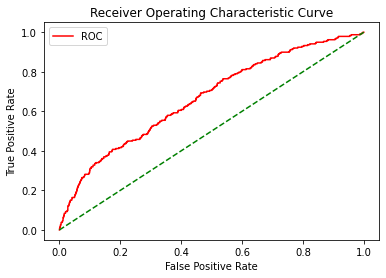

In [7]:
metricas(naive,df_eval,df_tgts[0])

<h1>Regressão logistica</h1>

In [8]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [9]:
model.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

cross validate :  {'fit_time': array([0.49969435, 0.58545399, 0.89959359, 0.78692913]), 'score_time': array([0.0029614 , 0.00297046, 0.00199485, 0.0029614 ]), 'test_score': array([0.941, 0.939, 0.932, 0.938])}

Matriz de confusão :  
 [[3749   13]
 [ 233    5]]

Recall :  
 0.508776397321289

Precision :  
 0.6096322339416262

AUC :  
 0.7063827125746629

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.28      0.02      0.04       238

    accuracy                           0.94      4000
   macro avg       0.61      0.51      0.50      4000
weighted avg       0.90      0.94      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


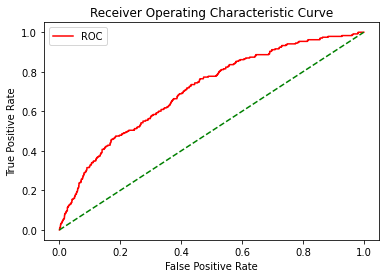

In [10]:
metricas(model, df_eval,df_tgts[0])

<h1>KNN</h1>

In [11]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.predict(df_eval)
print (knn.predict_proba(df_eval))

[[1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


cross validate :  {'fit_time': array([0.00598049, 0.00598216, 0.0039897 , 0.00698352]), 'score_time': array([0.14062595, 0.10870719, 0.09474778, 0.10172391]), 'test_score': array([0.932, 0.936, 0.93 , 0.931])}

Matriz de confusão :  
 [[3695   67]
 [ 225   13]]

Recall :  
 0.5184060865175416

Precision :  
 0.5525510204081633

AUC :  
 0.5937370163376356

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.16      0.05      0.08       238

    accuracy                           0.93      4000
   macro avg       0.55      0.52      0.52      4000
weighted avg       0.90      0.93      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


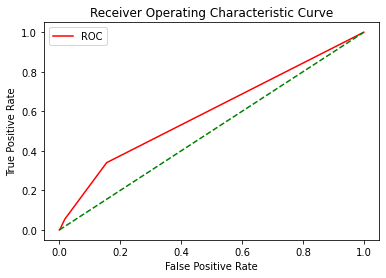

In [13]:
metricas(knn, df_eval,df_tgts[0])

# XGBoosting

In [14]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

cross validate :  {'fit_time': array([0.84174919, 0.85571241, 0.81681538, 0.83077669]), 'score_time': array([0.01296473, 0.01296616, 0.01795459, 0.01296616]), 'test_score': array([0.926, 0.918, 0.923, 0.915])}

Matriz de confusão :  
 [[3673   89]
 [ 220   18]]

Recall :  
 0.5259863115900267

Precision :  
 0.5558563057104652

AUC :  
 0.6720907661310138

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.17      0.08      0.10       238

    accuracy                           0.92      4000
   macro avg       0.56      0.53      0.53      4000
weighted avg       0.90      0.92      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


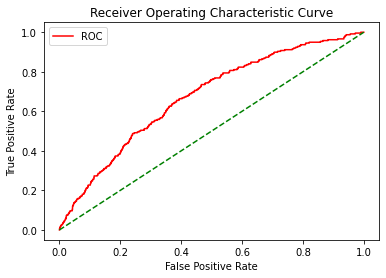

In [15]:
metricas(xgb,df_eval,df_tgts[0])

<h1>Random Forest</h1>

In [16]:
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

In [17]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=12)

cross validate :  {'fit_time': array([3.81784058, 3.70911884, 3.98136473, 3.91952705]), 'score_time': array([0.31419063, 0.25730157, 0.25630164, 0.25831079]), 'test_score': array([0.941, 0.941, 0.94 , 0.94 ])}

Matriz de confusão :  
 [[3762    0]
 [ 238    0]]

Recall :  
 0.5

Precision :  
 0.47025

AUC :  
 0.7131414766863684

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcos Tamas\anaconda3\lib\site-packag

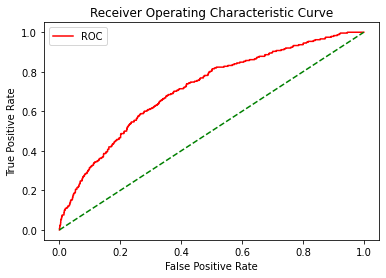

In [18]:
metricas(model_hyper.best_estimator_, df_eval, df_tgts[0])

<h1>Treinando com os melhores atributos</h1>

<h2>Lasso Regression para selecionar melhores features</h2>

In [19]:
search = GridSearchCV(Lasso(),
                      {'alpha':[0.0015,0.0025,0.0030,0.002,0.003,0.005]},
                      cv = 4, scoring="neg_mean_squared_error",verbose=0
                      )

In [20]:
search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0015, 0.0025, 0.003, 0.002, 0.003, 0.005]},
             scoring='neg_mean_squared_error')

In [21]:
search.best_params_

{'alpha': 0.0025}

In [22]:
coefficients = search.best_estimator_.coef_

In [23]:
importance = np.abs(coefficients)
importance

array([2.96934860e-04, 0.00000000e+00, 0.00000000e+00, 1.45743978e-03,
       9.03984413e-05, 0.00000000e+00, 3.08407904e-03, 4.26675027e-03,
       1.67676200e-03, 4.34559521e-03, 0.00000000e+00, 0.00000000e+00,
       1.43074846e-03, 0.00000000e+00, 0.00000000e+00, 3.65506012e-03,
       0.00000000e+00, 4.04414311e-03, 0.00000000e+00, 0.00000000e+00,
       2.09007020e-03, 3.23169962e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.07686180e-03, 0.00000000e+00, 3.11335683e-04,
       0.00000000e+00, 1.84191205e-05, 0.00000000e+00, 9.72513747e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.59740173e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.90877231e-03,
       2.76189722e-03, 2.01190709e-03, 1.20192181e-03, 6.37830388e-03,
       0.00000000e+00, 0.00000000e+00, 1.17750764e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00612402e-03, 0.00000000e+00,
      

In [24]:
np.array(X)[importance > 0].size

28

In [25]:
df_data_melhores = df_data[np.array(X)[importance > 0]]
df_eval_melhores = df_eval[np.array(X)[importance > 0]]

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_data_melhores, df_data[y], test_size=0.3, random_state=12)

<h1>Naive Baies</h1>

In [27]:
naive = MultinomialNB()
naive.fit(X_train2, y_train2)

fitted = naive.predict(df_eval_melhores)

cross validate :  {'fit_time': array([0.0059824 , 0.00498009, 0.00398993, 0.00299454]), 'score_time': array([0.00299883, 0.00099778, 0.00099707, 0.0019927 ]), 'test_score': array([0.801, 0.784, 0.814, 0.782])}

Matriz de confusão :  
 [[2995  767]
 [ 133  105]]

Recall :  
 0.6186477780905025

Precision :  
 0.5389468312255097

AUC :  
 0.6609588811601196

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      3762
           1       0.12      0.44      0.19       238

    accuracy                           0.78      4000
   macro avg       0.54      0.62      0.53      4000
weighted avg       0.91      0.78      0.83      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


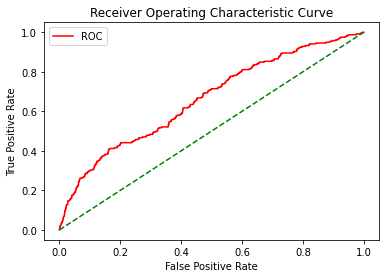

In [28]:
metricas(naive , df_eval_melhores, df_tgts[0])

<h1>Regressão logistica</h1>

In [29]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [30]:
model.fit(X_train2, y_train2)

LogisticRegression(C=1e+42, solver='liblinear')

cross validate :  {'fit_time': array([0.06881332, 0.04188752, 0.06083775, 0.05684066]), 'score_time': array([0.00199556, 0.00099826, 0.00299835, 0.00199509]), 'test_score': array([0.941, 0.94 , 0.939, 0.94 ])}

Matriz de confusão :  
 [[3756    6]
 [ 235    3]]

Recall :  
 0.5055050728425341

Precision :  
 0.637225423870375

AUC :  
 0.7061208055790098

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.33      0.01      0.02       238

    accuracy                           0.94      4000
   macro avg       0.64      0.51      0.50      4000
weighted avg       0.90      0.94      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


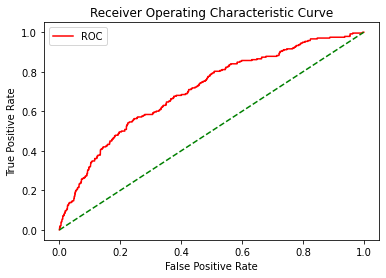

In [31]:
metricas(model , df_eval_melhores, df_tgts[0])

<h1>KNN</h1>

In [32]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)
knn.predict(df_eval_melhores)
print (knn.predict_proba(df_eval_melhores))

#fitted3 = knn.predict(df_eval)

[[1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]]


cross validate :  {'fit_time': array([0.00299501, 0.00598407, 0.00199533, 0.00299263]), 'score_time': array([0.12665844, 0.10571408, 0.0957427 , 0.10970688]), 'test_score': array([0.926, 0.933, 0.932, 0.928])}

Matriz de confusão :  
 [[3690   72]
 [ 226   12]]

Recall :  
 0.5156407060431828

Precision :  
 0.5425725959433825

AUC :  
 0.5869665250470204

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.14      0.05      0.07       238

    accuracy                           0.93      4000
   macro avg       0.54      0.52      0.52      4000
weighted avg       0.89      0.93      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


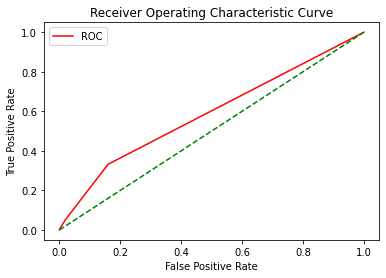

In [34]:
metricas(knn, df_eval_melhores,df_tgts[0])

# XGBoosting

In [35]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

cross validate :  {'fit_time': array([0.42386556, 0.41389275, 0.42087317, 0.37399983]), 'score_time': array([0.00897694, 0.00997329, 0.00897646, 0.00797915]), 'test_score': array([0.924, 0.924, 0.926, 0.915])}

Matriz de confusão :  
 [[3678   84]
 [ 216   22]]

Recall :  
 0.5350542130727889

Precision :  
 0.5760386080181411

AUC :  
 0.653484759134914

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.21      0.09      0.13       238

    accuracy                           0.93      4000
   macro avg       0.58      0.54      0.54      4000
weighted avg       0.90      0.93      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


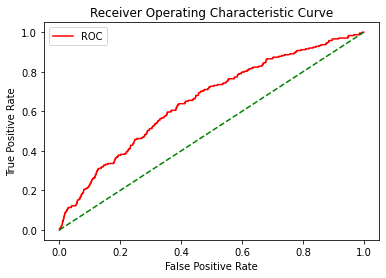

In [36]:
metricas(xgb,df_eval_melhores,df_tgts[0])

<h1>Random Forest</h1>

In [37]:
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

cross validate :  {'fit_time': array([2.25796008, 2.14529467, 2.09436178, 2.05350399]), 'score_time': array([0.11269736, 0.10768104, 0.12470031, 0.10973787]), 'test_score': array([0.926, 0.929, 0.926, 0.922])}

Matriz de confusão :  
 [[3713   49]
 [ 224   14]]

Recall :  
 0.5228992713512837

Precision :  
 0.5826630542149973

AUC :  
 0.6923553312872198

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3762
           1       0.22      0.06      0.09       238

    accuracy                           0.93      4000
   macro avg       0.58      0.52      0.53      4000
weighted avg       0.90      0.93      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


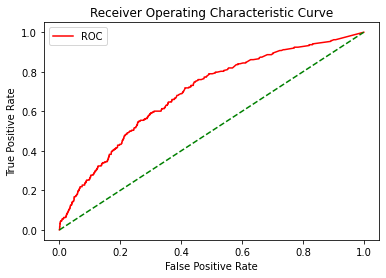

In [38]:
metricas(rf,df_eval_melhores,df_tgts[0])

<h2>Tentativa de melhora do Random Forest</h2>

In [39]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_train2,y_train2)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=12)

cross validate :  {'fit_time': array([5.94143391, 5.77458835, 5.84037876, 5.85042286]), 'score_time': array([0.1446147 , 0.14059114, 0.20049524, 0.17348742]), 'test_score': array([0.941, 0.941, 0.94 , 0.94 ])}

Matriz de confusão :  
 [[3759    3]
 [ 237    1]]

Recall :  
 0.5017021162531998

Precision :  
 0.5953453453453453

AUC :  
 0.7072114332176251

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.25      0.00      0.01       238

    accuracy                           0.94      4000
   macro avg       0.60      0.50      0.49      4000
weighted avg       0.90      0.94      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


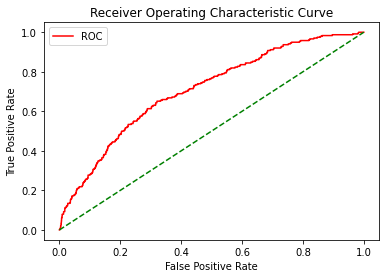

In [40]:
metricas(model_hyper.best_estimator_, df_eval_melhores, df_tgts[0])

<h1>Treinando com os melhores atributos e efetuando balanceamento dos dados para baixo</h1>

In [41]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train2, y_train2)

<h1>Naive Baies </h1>

In [42]:
naive = MultinomialNB()
naive.fit(X_res, y_res)

fitted = naive.predict(df_eval_melhores)

cross validate :  {'fit_time': array([0.00598407, 0.00498652, 0.00498652, 0.00598407]), 'score_time': array([0.00299311, 0.00199485, 0.00199389, 0.00199604]), 'test_score': array([0.801, 0.784, 0.814, 0.782])}

Matriz de confusão :  
 [[2549 1213]
 [ 113  125]]

Recall :  
 0.6013876044835798

Precision :  
 0.5254868665905245

AUC :  
 0.6709526713396683

              precision    recall  f1-score   support

           0       0.96      0.68      0.79      3762
           1       0.09      0.53      0.16       238

    accuracy                           0.67      4000
   macro avg       0.53      0.60      0.48      4000
weighted avg       0.91      0.67      0.76      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


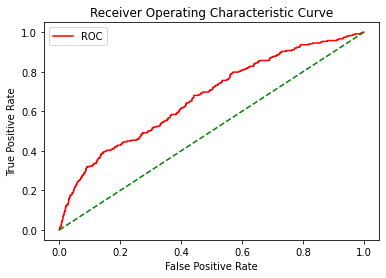

In [43]:
metricas(naive , df_eval_melhores, df_tgts[0])

<h1>Regressão logistica</h1>

In [44]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [45]:
model.fit(X_res, y_res)

LogisticRegression(C=1e+42, solver='liblinear')

cross validate :  {'fit_time': array([0.06781793, 0.04089046, 0.05385447, 0.04687309]), 'score_time': array([0.00199604, 0.00199509, 0.00199556, 0.00199723]), 'test_score': array([0.941, 0.94 , 0.939, 0.94 ])}

Matriz de confusão :  
 [[2526 1236]
 [  92  146]]

Recall :  
 0.6424483669065713

Precision :  
 0.5352513324761559

AUC :  
 0.7015438551816261

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      3762
           1       0.11      0.61      0.18       238

    accuracy                           0.67      4000
   macro avg       0.54      0.64      0.49      4000
weighted avg       0.91      0.67      0.76      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


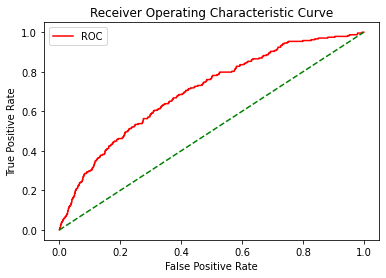

In [46]:
metricas(model , df_eval_melhores, df_tgts[0])

<h1>KNN</h1>

In [47]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_res, y_res)
knn.predict(df_eval_melhores)
print (knn.predict_proba(df_eval_melhores))

[[1.         0.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 ...
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.66666667 0.33333333]]


cross validate :  {'fit_time': array([0.00299239, 0.00299168, 0.00399733, 0.00199556]), 'score_time': array([0.09474611, 0.11369729, 0.116678  , 0.08776402]), 'test_score': array([0.926, 0.933, 0.932, 0.928])}

Matriz de confusão :  
 [[2304 1458]
 [  79  159]]

Recall :  
 0.640253709139158

Precision :  
 0.5325893757342711

AUC :  
 0.6656620383400569

              precision    recall  f1-score   support

           0       0.97      0.61      0.75      3762
           1       0.10      0.67      0.17       238

    accuracy                           0.62      4000
   macro avg       0.53      0.64      0.46      4000
weighted avg       0.92      0.62      0.72      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


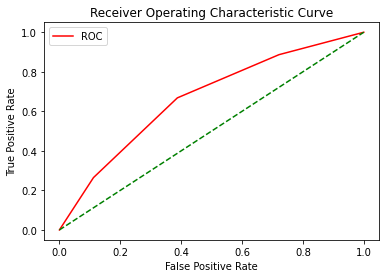

In [49]:
metricas(knn, df_eval_melhores,df_tgts[0])

# XGBoosting

In [50]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

cross validate :  {'fit_time': array([0.4118979 , 0.45079446, 0.41987681, 0.37100768]), 'score_time': array([0.00997376, 0.00897741, 0.00797915, 0.00897622]), 'test_score': array([0.924, 0.924, 0.926, 0.915])}

Matriz de confusão :  
 [[2342 1420]
 [  89  149]]

Recall :  
 0.6242958108283185

Precision :  
 0.5291772487251061

AUC :  
 0.6638839746424885

              precision    recall  f1-score   support

           0       0.96      0.62      0.76      3762
           1       0.09      0.63      0.16       238

    accuracy                           0.62      4000
   macro avg       0.53      0.62      0.46      4000
weighted avg       0.91      0.62      0.72      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


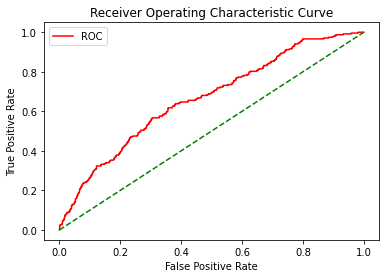

In [51]:
metricas(xgb,df_eval_melhores,df_tgts[0])

<h1>Random Forest</h1>

In [52]:
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_res, y_res)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

cross validate :  {'fit_time': array([1.9537735 , 1.80313468, 1.81511164, 1.80721664]), 'score_time': array([0.11274076, 0.11073661, 0.11071038, 0.12270522]), 'test_score': array([0.926, 0.929, 0.926, 0.922])}

Matriz de confusão :  
 [[2471 1291]
 [  88  150]]

Recall :  
 0.6435417867306412

Precision :  
 0.5348529729609529

AUC :  
 0.7071768101179866

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      3762
           1       0.10      0.63      0.18       238

    accuracy                           0.66      4000
   macro avg       0.53      0.64      0.48      4000
weighted avg       0.91      0.66      0.75      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


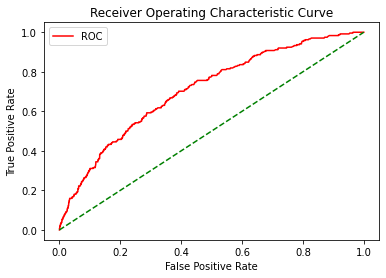

In [53]:
metricas(rf,df_eval_melhores,df_tgts[0])

<h2>Tentativa de melhora do Random Forest</h2>

In [54]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_res, y_res)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=12)

cross validate :  {'fit_time': array([6.69306493, 7.21769381, 5.92614961, 5.77255845]), 'score_time': array([0.19847035, 0.16057205, 0.14461255, 0.13962817]), 'test_score': array([0.941, 0.941, 0.94 , 0.94 ])}

Matriz de confusão :  
 [[2435 1327]
 [  84  154]]

Recall :  
 0.6471604590799638

Precision :  
 0.5353186143178152

AUC :  
 0.7050592166691239

              precision    recall  f1-score   support

           0       0.97      0.65      0.78      3762
           1       0.10      0.65      0.18       238

    accuracy                           0.65      4000
   macro avg       0.54      0.65      0.48      4000
weighted avg       0.92      0.65      0.74      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


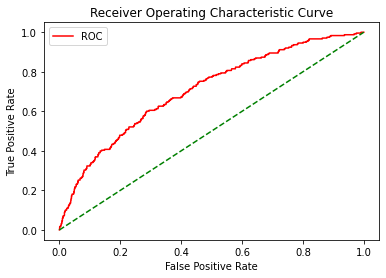

In [55]:
metricas(model_hyper.best_estimator_, df_eval_melhores, df_tgts[0])